In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
from mov_avg import load_data, clean_data, features_engineering, whiten_data, split_test_train

In [2]:
prices = load_data()
prices = clean_data(prices)
prices = whiten_data(prices)
prices, dep_var = features_engineering(prices)

Dropped 87801 out of 231152 rows containing NaNs
Dropped 981 out of 143351 rows with extreme z-score
Dropped 5 out of 142370 rows containing NaNs


In [22]:
# Compute the correlation matrix
corr = prices.corr()

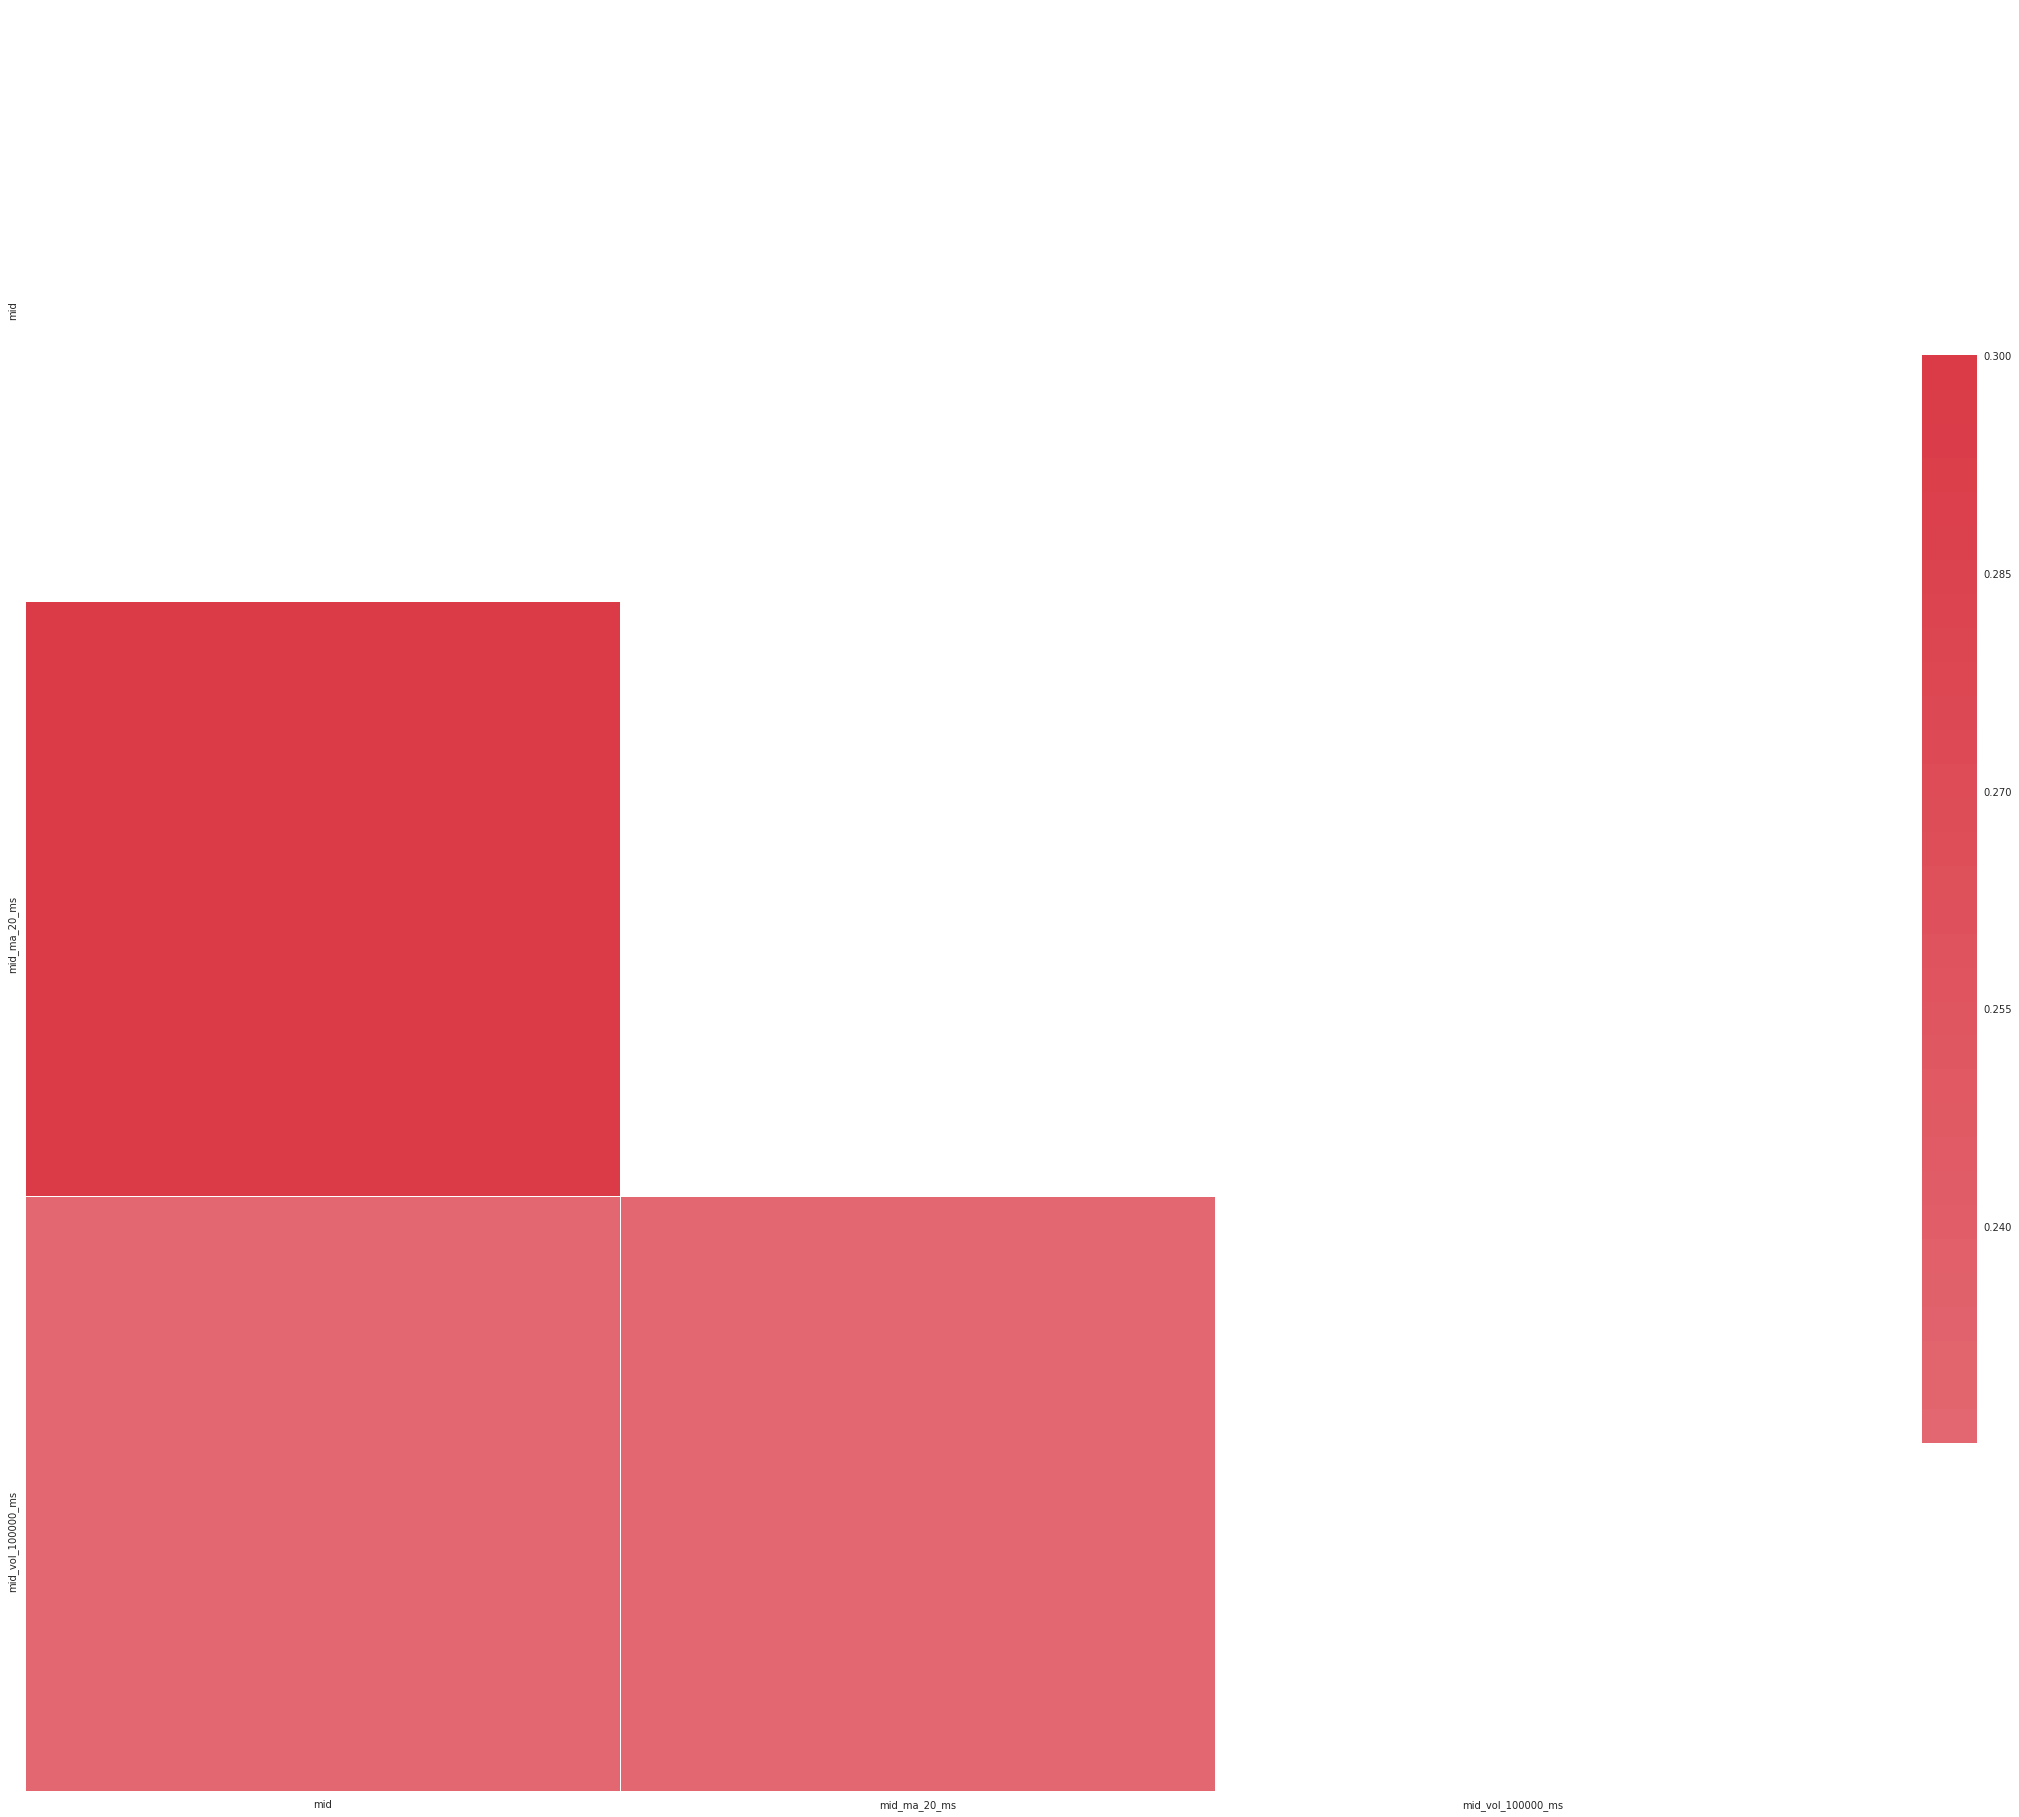

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
prices_selected = prices.copy(deep = True)
prices_selected = prices[['date', 'mid', 'mid_ma_20_ms', 'mid_vol_100000_ms']]

In [32]:
X_train, y_train, y_train_value, X_test, y_test, y_test_value = split_test_train(prices_selected, dep_var)

In [43]:
from sklearn import linear_model
for alpha in np.logspace(-10, 10, 40):
    reg = linear_model.Ridge(alpha = alpha, max_iter = 1e5, normalize = True, tol = 1e-8)
    reg.fit(X_train, y_train_value)
    print alpha, np.linalg.norm(reg.predict(X_train) - y_train_value), np.linalg.norm(np.sign(reg.predict(X_train), ord = 1) - y_train, 1) / 2
    

1e-10 1.2472991073491269

TypeError: 'ord' is an invalid keyword to ufunc 'sign'

In [42]:
np.linalg.norm(np.sign(reg.predict(X_test)) - y_test

array([0., 0., 2., ..., 0., 2., 2.])

In [12]:
prices_selected

,date,mid,mid_ma_20_ms,mid_ma_80_ms,mid_ma_1000_ms,mid_ma_1000_ms,mid_vol_100000_ms
feedHandlerReceiveTime,,,,,,,
2017-09-15 03:14:34.841,2017-09-15,-0.9255,-0.925500,-0.928417,-0.927796,-0.927796,0.002458
2017-09-15 03:15:40.591,2017-09-15,-0.9255,-0.925500,-0.925500,-0.927706,-0.927706,0.001118
2017-09-15 03:16:01.092,2017-09-15,-0.9255,-0.925500,-0.925500,-0.927623,-0.927623,0.000000
2017-09-15 03:16:01.842,2017-09-15,-0.9305,-0.927167,-0.926500,-0.927676,-0.927676,0.001890
2017-09-15 03:16:04.092,2017-09-15,-0.9330,-0.930083,-0.928938,-0.927956,-0.927956,0.003623
2017-09-15 03:16:04.842,2017-09-15,-0.9380,-0.931214,-0.929944,-0.928129,-0.928129,0.004523
2017-09-15 03:16:05.092,2017-09-15,-0.9355,-0.931750,-0.930500,-0.928254,-0.928254,0.004687
2017-09-15 03:16:05.842,2017-09-15,-0.9355,-0.932167,-0.930955,-0.928375,-0.928375,0.004770
2017-09-15 03:16:06.841,2017-09-15,-0.9330,-0.932250,-0.931125,-0.928451,-0.928451,0.004648


In [13]:
X_train

array([[-9.25500000e-01, -9.25500000e-01, -9.28416667e-01,
        -9.27795918e-01, -9.27795918e-01,  2.45798020e-03],
       [-9.25500000e-01, -9.25500000e-01, -9.25500000e-01,
        -9.27705882e-01, -9.27705882e-01,  1.11803399e-03],
       [-9.25500000e-01, -9.25500000e-01, -9.25500000e-01,
        -9.27622642e-01, -9.27622642e-01,  0.00000000e+00],
       ...,
       [ 4.14500000e-01,  4.16500000e-01,  4.16583333e-01,
         4.10091398e-01,  4.10091398e-01,  8.44579969e-04],
       [ 4.14500000e-01,  4.15928571e-01,  4.16558824e-01,
         4.10109319e-01,  4.10109319e-01,  1.09108951e-03],
       [ 4.17000000e-01,  4.15928571e-01,  4.16333333e-01,
         4.10138489e-01,  4.10138489e-01,  1.08972478e-03]])

In [37]:
y_test_value

array([ 0.0025,  0.0025, -0.01  , ...,  0.0025, -0.0025, -0.0025])

In [38]:
np.sign(y_test_value)

array([ 1.,  1., -1., ...,  1., -1., -1.])